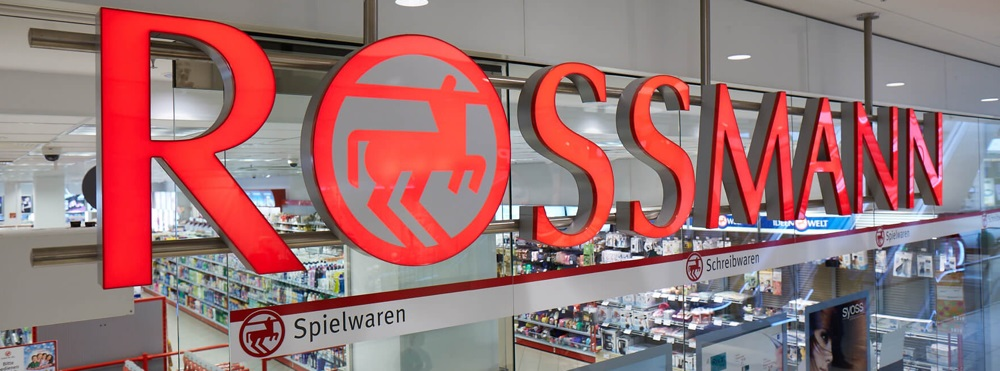

#### Summary
This project aims to predict the daily sales of 1,115 Rossmann stores across Europe for up to six weeks in advance using machine learning regression models. The model takes into consideration various factors that influence store sales, such as promotions, competition, holidays, seasonality, and locality.

This dataset is a live dataset of Roseman Stores. On analsysing this problem we observe that Roseman problem is a regression problem and our primarily goal is to predict the sales figures of Roseman problem.

In this project, I have attempted to analyze the retail sales dataset of Rossmann stores and build a predictive model to forecast the sales of any Rossmann store for any date. No personal information of customer is provided in this dataset.

In this Notebook we work on following topics

Analysing the Dataset by using Exploratory Data Analysis. Using Exponential Moving Averages analyse Trends and Seasonality in Roseman dataset. Analyse Regression analysis using following prediction analysis, A. Linear Regression Analysis B. Elastic Regression ( Lasso and Ridge Regression). C. Random Forest Regression. d.Xgboost).

### 🔹Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import plotly.express as px
import ast
import math
import random
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle

#to display all the graph in the workbook
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
import warnings
warnings.filterwarnings("ignore")
     

### 🔹 Importing dataset

In [2]:
#Rossmann Data
sales_df = pd.read_csv(r"C:\Users\ZMZM\Desktop\Dataset\Rossmann\sales.csv", low_memory=False)
#store data
store_df = pd.read_csv(r"C:\Users\ZMZM\Desktop\Dataset\Rossmann\rossmann.csv", low_memory=False)

In [3]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [5]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


### 🔹 Dataset Rows & Columns count

In [7]:
sales_df.shape

(1017209, 9)

In [8]:
sales_df.index

RangeIndex(start=0, stop=1017209, step=1)

In [9]:
sales_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [10]:
store_df.shape

(1115, 10)

In [11]:
store_df.index

RangeIndex(start=0, stop=1115, step=1)

In [12]:
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

### 🔹 Dataset Information

In [13]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [14]:
#checking description of data #sale
sales_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


In [15]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [16]:
#checking description of data of store dataset
store_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.000000,322.017080,1.0,279.5,558.0,836.5,1115.0
CompetitionDistance,1112.0,5404.901079,7663.174720,20.0,717.5,2325.0,6882.5,75860.0
CompetitionOpenSinceMonth,761.0,7.224704,3.212348,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,761.0,2008.668857,6.195983,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,1115.0,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,571.0,23.595447,14.141984,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,571.0,2011.763573,1.674935,2009.0,2011.0,2012.0,2013.0,2015.0


### 🔹 Duplicate Values

In [17]:
# Dataset Duplicate Value Count
df2 = sales_df.pivot_table(index = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],)
print(df2)

Empty DataFrame
Columns: []
Index: [(1, 1, 2013-01-07, 7176, 785, 1, 1, 0, 1), (1, 1, 2013-01-14, 4717, 616, 1, 0, 0, 0), (1, 1, 2013-01-21, 5394, 607, 1, 1, 0, 0), (1, 1, 2013-01-28, 4055, 549, 1, 0, 0, 0), (1, 1, 2013-02-04, 7032, 762, 1, 1, 0, 0), (1, 1, 2013-02-11, 4409, 599, 1, 0, 0, 0), (1, 1, 2013-02-18, 6407, 710, 1, 1, 0, 0), (1, 1, 2013-02-25, 4038, 534, 1, 0, 0, 0), (1, 1, 2013-03-04, 7675, 840, 1, 1, 0, 0), (1, 1, 2013-03-11, 4949, 618, 1, 0, 0, 0), (1, 1, 2013-03-18, 7072, 778, 1, 1, 0, 0), (1, 1, 2013-03-25, 6729, 777, 1, 1, 0, 1), (1, 1, 2013-04-01, 0, 0, 0, 0, b, 1), (1, 1, 2013-04-08, 6046, 695, 1, 1, 0, 0), (1, 1, 2013-04-15, 3941, 526, 1, 0, 0, 0), (1, 1, 2013-04-22, 5672, 623, 1, 1, 0, 0), (1, 1, 2013-04-29, 5821, 641, 1, 1, 0, 0), (1, 1, 2013-05-06, 4568, 562, 1, 0, 0, 0), (1, 1, 2013-05-13, 6106, 660, 1, 1, 0, 0), (1, 1, 2013-05-20, 0, 0, 0, 0, a, 0), (1, 1, 2013-05-27, 5519, 606, 1, 1, 0, 0), (1, 1, 2013-06-03, 5422, 619, 1, 1, 0, 0), (1, 1, 2013-06-10, 4291, 531

### 🔹 Missing Values/Null Values

In [18]:
sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [19]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [20]:
#Here I want to know the missing values in percentage
store_null = store_df.apply(pd.isnull).sum()/store_df.shape[0]
store_null.round(2)

Store                        0.00
StoreType                    0.00
Assortment                   0.00
CompetitionDistance          0.00
CompetitionOpenSinceMonth    0.32
CompetitionOpenSinceYear     0.32
Promo2                       0.00
Promo2SinceWeek              0.49
Promo2SinceYear              0.49
PromoInterval                0.49
dtype: float64

<Axes: >

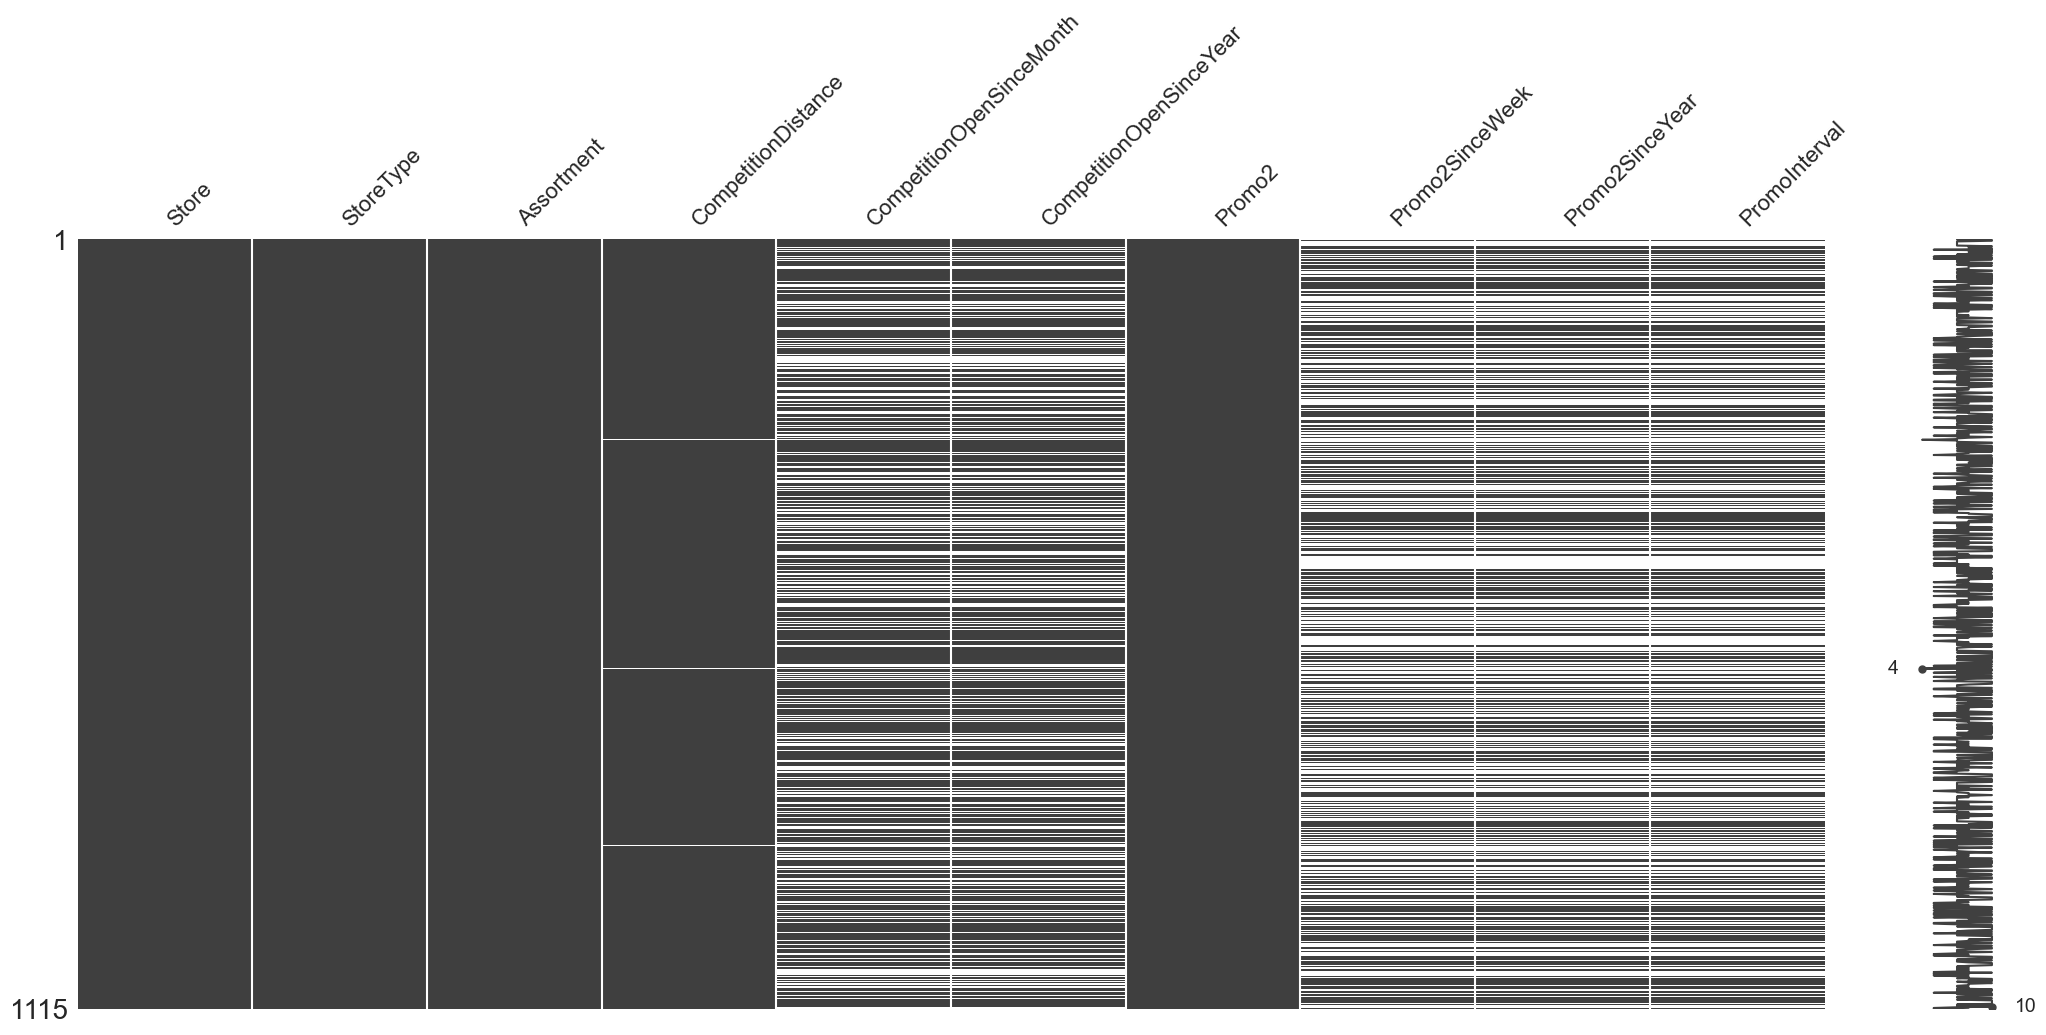

In [21]:
# Visualizing the missing values for store dataframe
import missingno as msno
msno.matrix(store_df)

In [22]:
store_df['Promo2SinceWeek'].fillna(0, inplace=True)
store_df['Promo2SinceYear'].fillna(0, inplace=True)
store_df['PromoInterval'].fillna(0, inplace=True)

#Check for null values again
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

For ComptetionDistance that are not available we can put them on 0 since there is no competition in the area and also the corresponding rows 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear'. Next step is looking at the other features. CompetitionYear and Month have the same number of none values. Next step is to imputate the rest of the missing values. The values missing do have competitionDistance filled but don't know since when the competition was open. In this case the values are missing at random (MAR). For now the date in month and year are categorical so we can fill them with mode 

In [23]:
store_df['CompetitionDistance'].fillna(0, inplace=True)

# Identify rows where CompetitionDistance was filled with 0
filled_with_zero = store_df['CompetitionDistance'] == 0

# Fill corresponding rows in CompetitionOpenSinceMonth and CompetitionOpenSinceYear with 0
store_df.loc[filled_with_zero, 'CompetitionOpenSinceMonth'] = 0
store_df.loc[filled_with_zero, 'CompetitionOpenSinceYear'] = 0

#Check for null values
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    351
CompetitionOpenSinceYear     351
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

In [24]:
#Fill the rest of NA with mode
months = store_df['CompetitionOpenSinceMonth'].mode()
years = store_df['CompetitionOpenSinceYear'].mode()

store_df['CompetitionOpenSinceMonth'].fillna(months[0], inplace=True)
store_df['CompetitionOpenSinceYear'].fillna(years[0], inplace=True)

#Check for null values
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

The data preperation is now finished. We do need to keep in mind that there are a lot of data when the store was closed. In the overview of Rossman Store it was said that the store was going in a renovation, so this would explain the data when the store was closed.

In [25]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,9.0,2013.0,0,0.0,0.0,0
1113,1114,a,c,870.0,9.0,2013.0,0,0.0,0.0,0


### 🔹 Merging datsets

In [26]:
# Merge the two datasets based on the 'Store' column on left
total_df = pd.merge(sales_df, store_df, on='Store', how='left')
print("Data has been successfully merged")

Data has been successfully merged


In [27]:
rossmann = total_df.copy()

In [28]:
rossmann

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,9.0,2013.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,9.0,2013.0,0,0.0,0.0,0


In [29]:
rossmann.to_csv('rossmann_BI.csv', index=False)
print("file has been successfully saved")

file has been successfully saved


In [30]:
sales_df.to_csv('sales_BI.csv', index=False)
print("file has been successfully saved")

file has been successfully saved


In [31]:
store_df.to_csv('store_BI.csv', index=False)
print("file has been successfully saved")

file has been successfully saved


In [32]:
# change datatype object into date format
sales_df['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

The dataset is from 1 January 2013 to 31 July 2015 , i.e. approx. 2.5 yrs

In [33]:
days = ["DayOfWeek" , "StateHoliday" , "SchoolHoliday"]

for i in days:
  print(i)
  print(rossmann[i].unique())
  print("-----------------------")

DayOfWeek
[5 4 3 2 1 7 6]
-----------------------
StateHoliday
['0' 'a' 'b' 'c']
-----------------------
SchoolHoliday
[1 0]
-----------------------


In [34]:
#Change data types object to int
rossmann.loc[rossmann['StateHoliday'] == '0', 'StateHoliday'] = 0
rossmann.loc[rossmann['StateHoliday'] == 'a', 'StateHoliday'] = 1
rossmann.loc[rossmann['StateHoliday'] == 'b', 'StateHoliday'] = 2
rossmann.loc[rossmann['StateHoliday'] == 'c', 'StateHoliday'] = 3

rossmann['StateHoliday'] = rossmann['StateHoliday'].astype(int, copy=False)

In [35]:
# change Data Types object into int
rossmann.loc[rossmann['Assortment'] == 'a', 'Assortment'] = 0
rossmann.loc[rossmann['Assortment'] == 'b', 'Assortment'] = 1
rossmann.loc[rossmann['Assortment'] == 'c', 'Assortment'] = 2

rossmann['Assortment'] = rossmann['Assortment'].astype(int, copy=False)

In [36]:
# change Data Types object into int
rossmann.loc[rossmann['StoreType'] == 'a', 'StoreType'] = 0
rossmann.loc[rossmann['StoreType'] == 'b', 'StoreType'] = 1
rossmann.loc[rossmann['StoreType'] == 'c', 'StoreType'] = 2
rossmann.loc[rossmann['StoreType'] == 'd', 'StoreType'] = 3

rossmann['StoreType'] = rossmann['StoreType'].astype(int, copy=False)

In [37]:
print(rossmann[['StateHoliday', 'Assortment', 'StoreType']].nunique())

StateHoliday    4
Assortment      3
StoreType       4
dtype: int64


In [38]:
rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int32  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int32  
 10  Assortment                 1017209 non-null  int32  
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [39]:
rossmann['Sales'].value_counts()

Sales
0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: count, Length: 21734, dtype: int64

### 🔹 changing format of date from object to datetime

In [40]:
rossmann['Date'] = pd.to_datetime(rossmann['Date'], format= '%Y-%m-%d')

In [41]:
rossmann['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(rossmann['Date']).month

In [42]:
#change float into integer
rossmann['CompetitionOpenSinceYear']= rossmann['CompetitionOpenSinceYear'].astype(int)
rossmann['Promo2SinceYear']= rossmann['Promo2SinceYear'].astype(int)

In [43]:
#change float into integer
rossmann['CompetitionDistance']= rossmann['CompetitionDistance'].astype(int)
rossmann['Promo2SinceWeek']= rossmann['Promo2SinceWeek'].astype(int)

In [44]:
rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int32         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int32         
 10  Assortment                 1017209 non-null  int32         
 11  CompetitionDistance        1017209 no

### 🔹 Data Vizualization, Storytelling & Experimenting

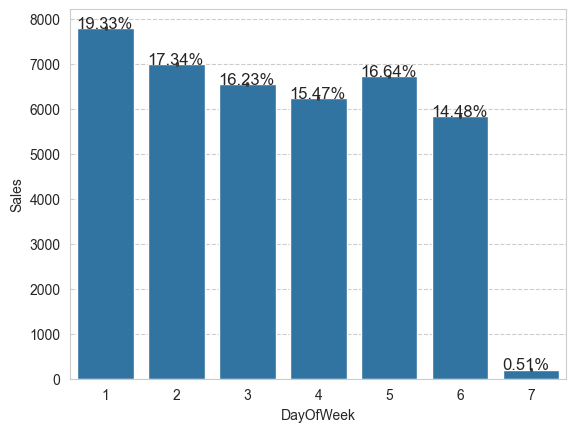

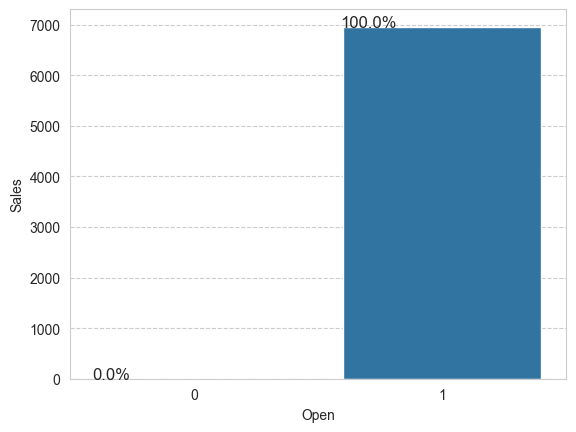

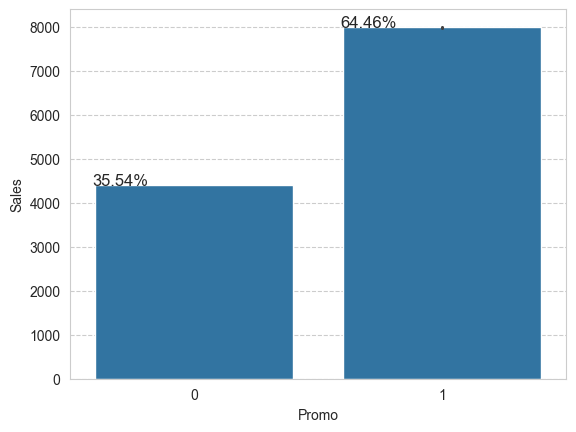

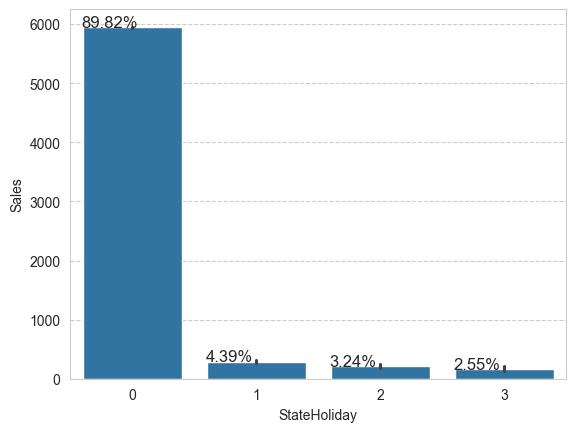

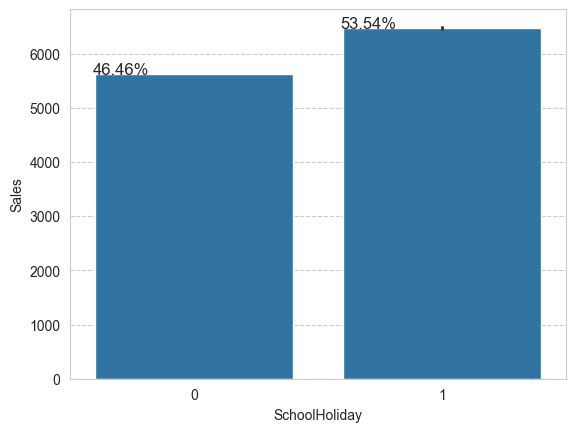

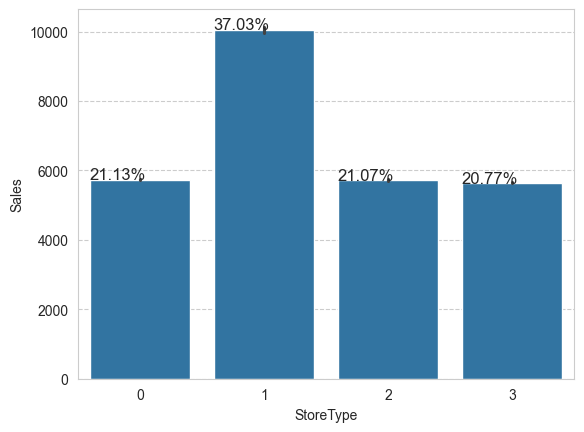

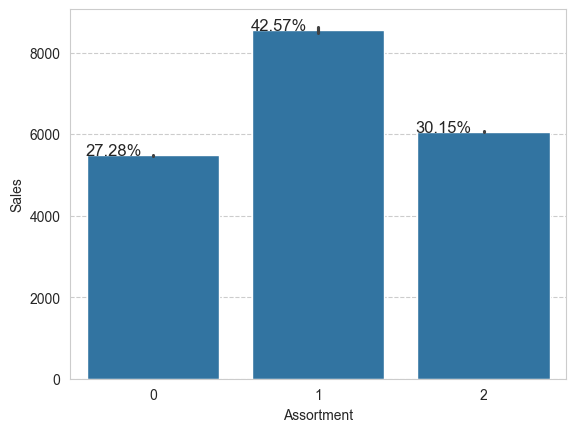

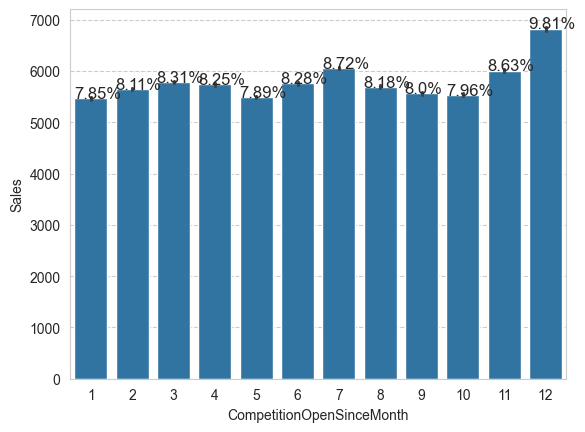

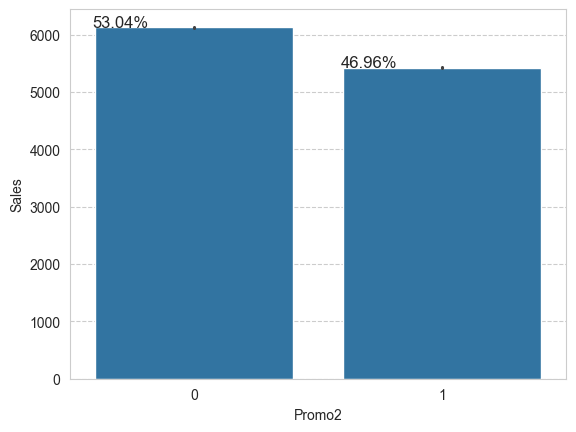

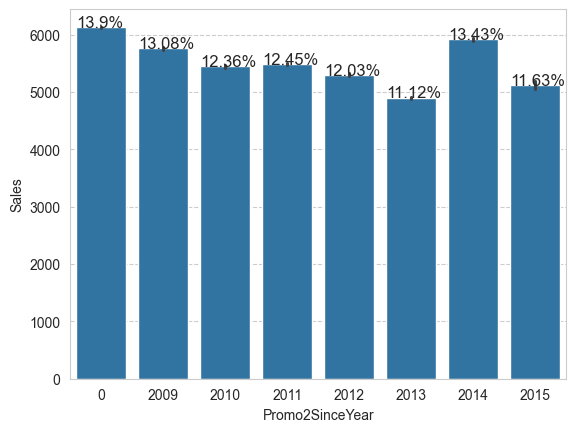

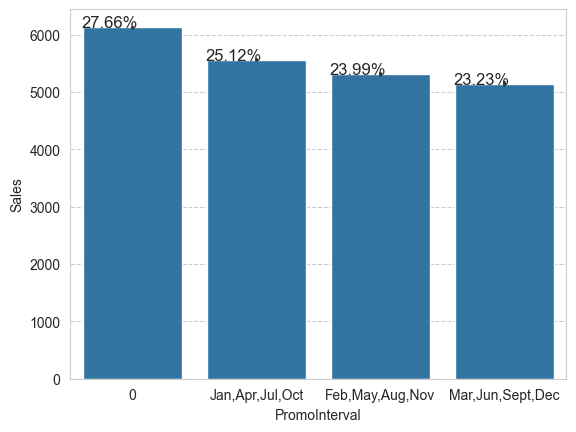

In [45]:
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  ax = sns.barplot(x=rossmann[value], y=rossmann['Sales'])
  totals = []
  for i in ax.patches:
      totals.append(i.get_height())

  total = sum(totals)

  for i in ax.patches:
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12) 
  plt.show()


### ✅ The insights found from the chart:

1-There were more sales on Monday, probably because shops generally remain closed on Sundays.

2- It could be seen that the Promo leads to more sales.

3- Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None.

4- Lowest of Sales were seen on state holidays especially on Christmas.

5- More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.

6- On an average Store type B had the highest sales.

7- Highest average sales were seen with Assortment levels-b which is 'extra'.

8-  Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.

### 🔹 Find when should we refurbish our store?

In [46]:
# this code is to apply the (hue) in next cell only
rossmann['DayOfWeekString'] = rossmann.DayOfWeek.apply(str)

<Axes: xlabel='Open', ylabel='Sales'>

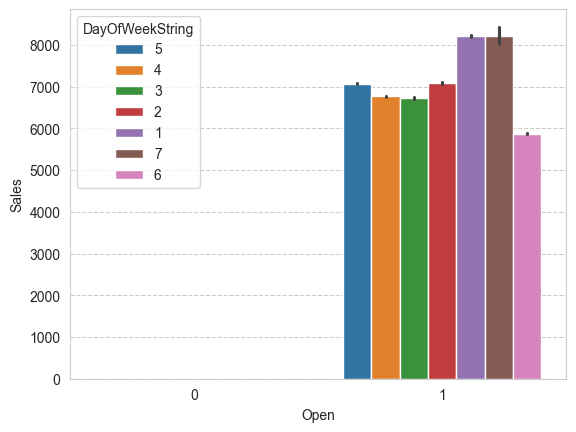

In [47]:
sns.barplot(x=rossmann["Open"], y=rossmann["Sales"], hue=rossmann["DayOfWeekString"])

#### we can see that 1 that is monday and 7 that is sunday have huge sale rate. and there is a lowest sale rate on 6 that is saturday.

#### For refurbishment we should close store on Saturday .

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

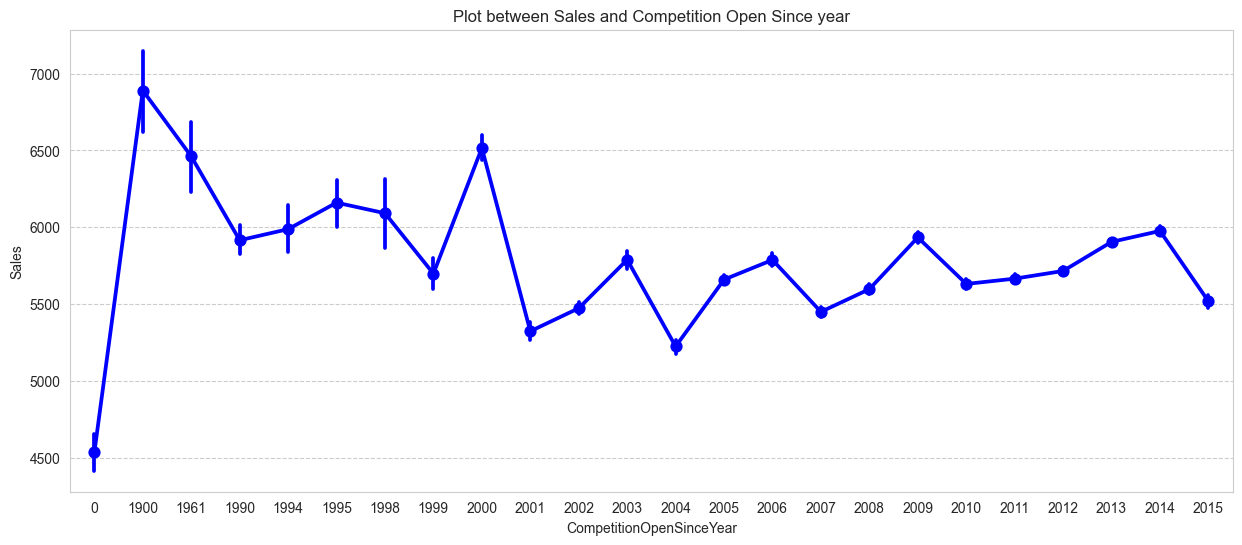

In [48]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=rossmann, color='blue')
sns.set_style("dark")
plt.title('Plot between Sales and Competition Open Since year')

#### From This Graph I saw that sales of stores is effected which continues their promotion.The Sales in 2013 is low, and in 2015 is "very low" inspite of promotion.The reason can be more competiton year by year

#### Advice: The store should promote themselves on social media to get fast result in grouth of sale.

Text(0.5, 1.0, 'Plot between Sales and CompetitionOpenSinceMonth ')

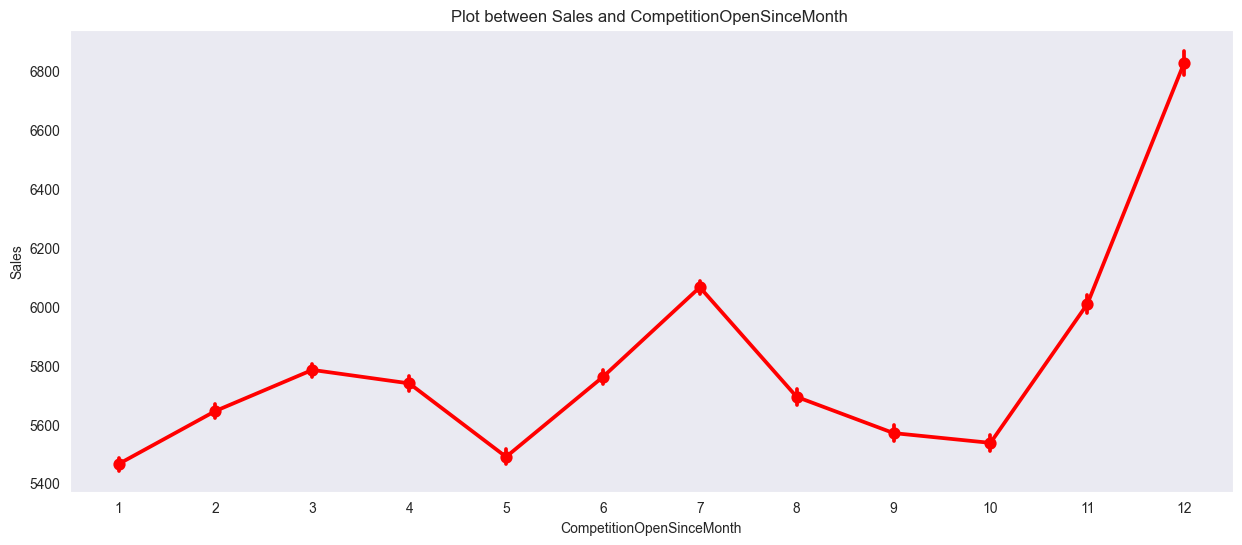

In [49]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=rossmann,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and CompetitionOpenSinceMonth ')

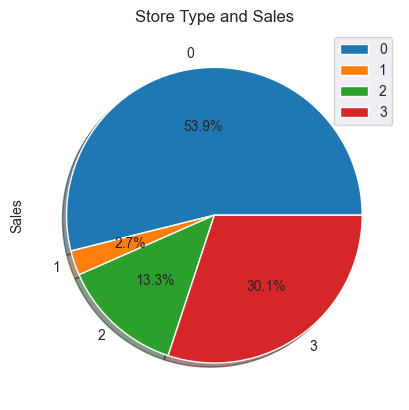

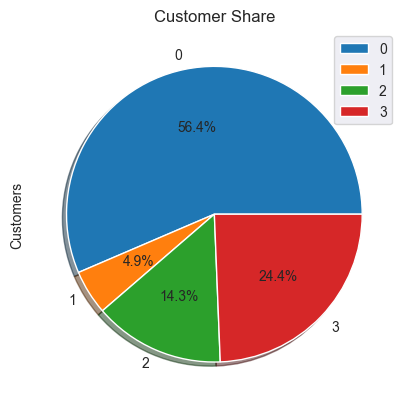

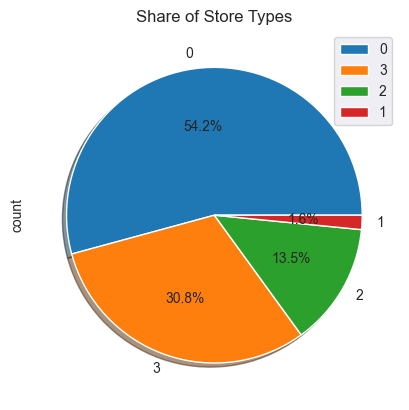

In [50]:
#sales and store type
rossmann.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

#customers and store type
rossmann.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

#store types in all of the dataset
rossmann["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

The majority of the stores are physical stores (68.2%).

There is a small percentage of online stores (13.5%).

There is a small percentage of other types of stores (18.3%).

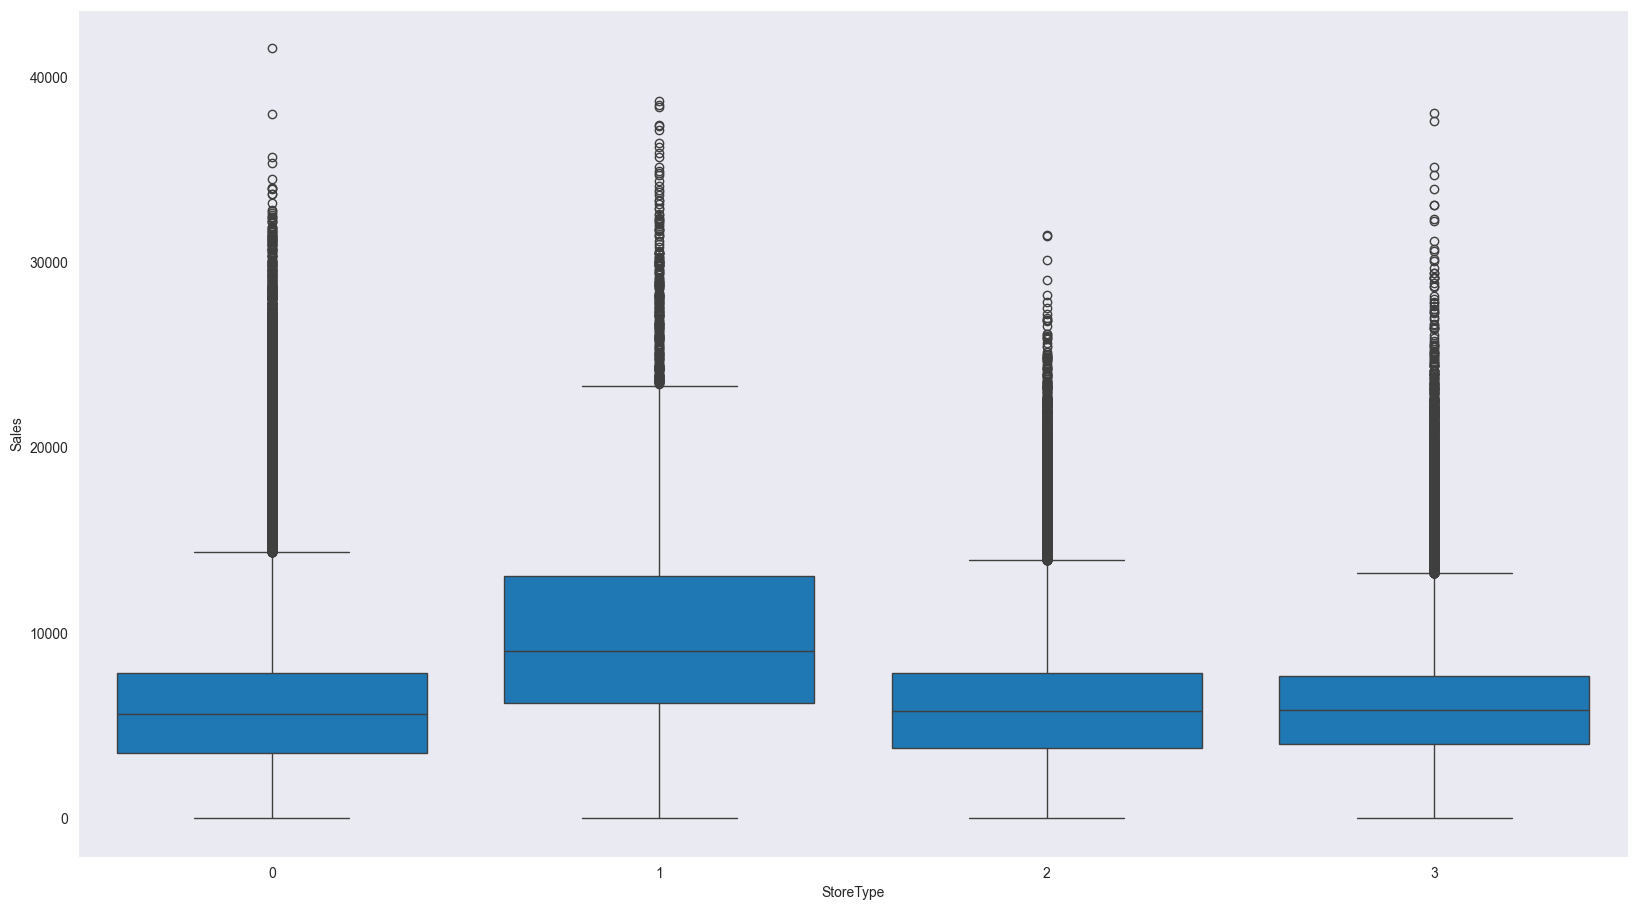

In [51]:
# ploting a box plot
plt.figure(figsize=(20, 11)) #figer size
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=rossmann, saturation=1.5,width=0.8)  # box plot ploting.
plt.show()

The distribution of sales is skewed to the right.

There are a few stores that have very high sales.

The average sales are around $10000.

The median sales are around $5000.

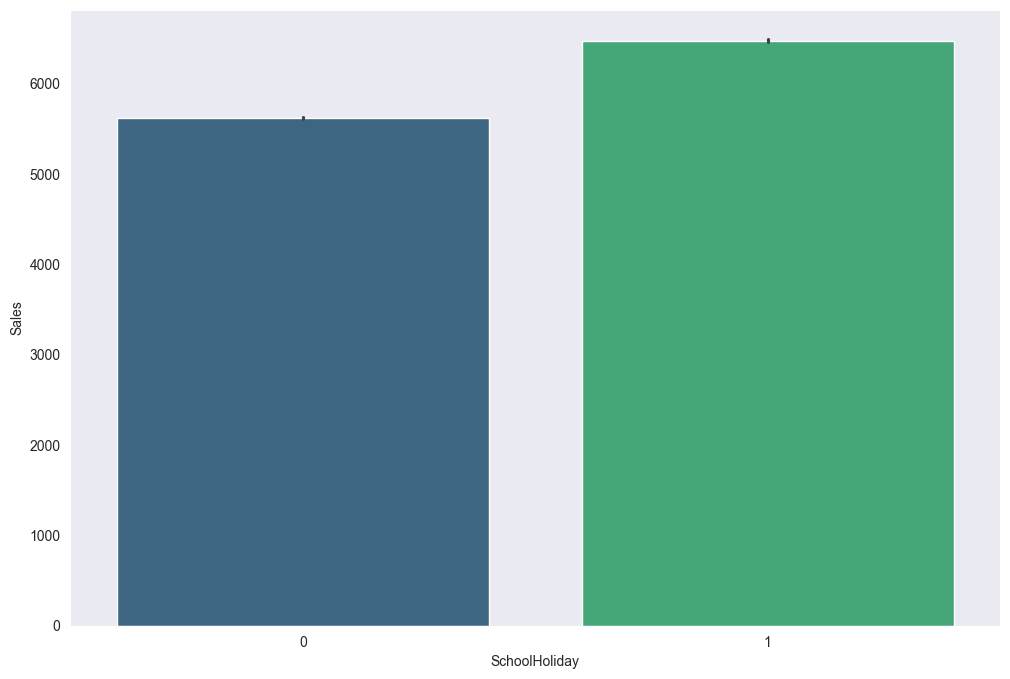

In [52]:
plt.figure(figsize=(12, 8))
stateholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales", data=rossmann,palette='viridis')

### 0='Not Holiday'       ||      1='Holiday'

- We can observe that most of the stores remain closed during State and Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays. Another important thing to note is that the stores which were opened during School holidays had more sales than normal.

- Sales are significantly higher during school holidays than during non-school holidays.
- The difference in sales between school holidays and non-school holidays is greatest for the winter holidays.
- There is a smaller difference in sales between school holidays and non-school holidays for the summer holidays.

In [53]:
# this code is to apply the (hue) in next cell only
rossmann['promoString'] = rossmann.Promo.apply(str)

Text(0.5, 1.0, 'Store Daily Promo Countplot')

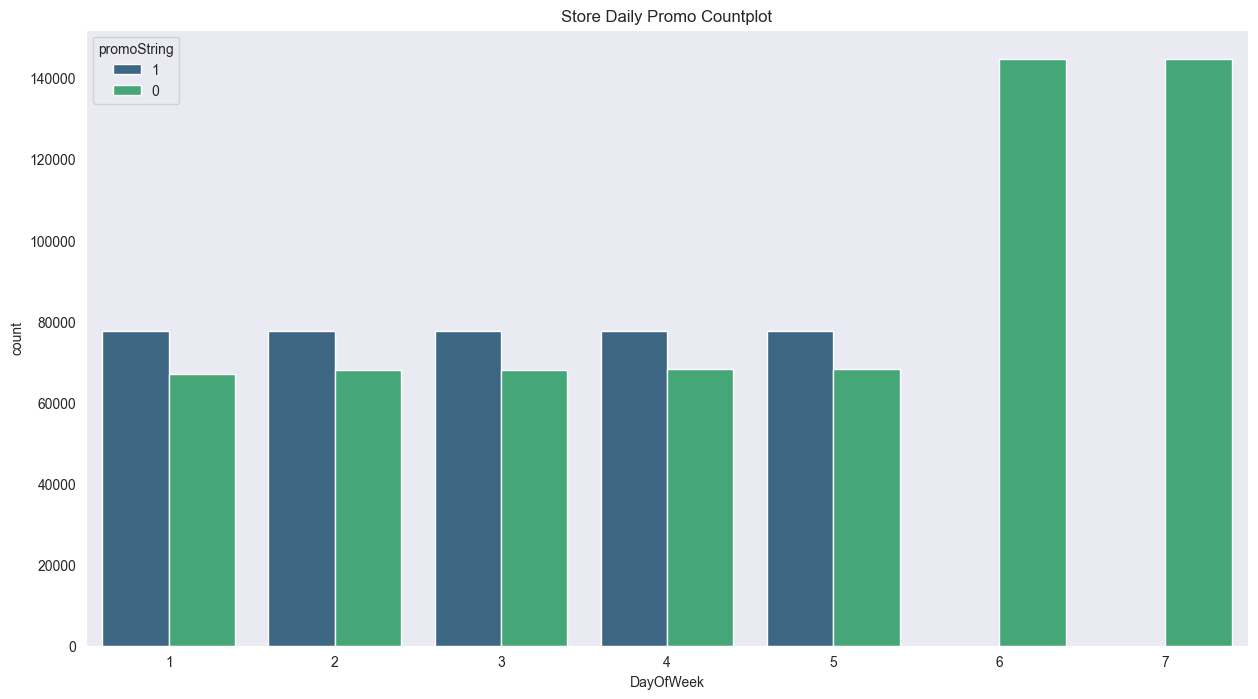

In [54]:
plt.figure(figsize=(15, 8)) # fig size
sns.countplot(x= 'DayOfWeek', hue='promoString', data= rossmann, palette='viridis')
plt.title('Store Daily Promo Countplot')

 - Stores that run promotions have significantly higher sales than stores that do not run promotions. The difference in sales between stores that run promotions and stores that do not run promotions is greatest for the White Friday promotion. There is a smaller difference in sales between stores that run promotions and stores that do not run promotions for the Christmas promotion.

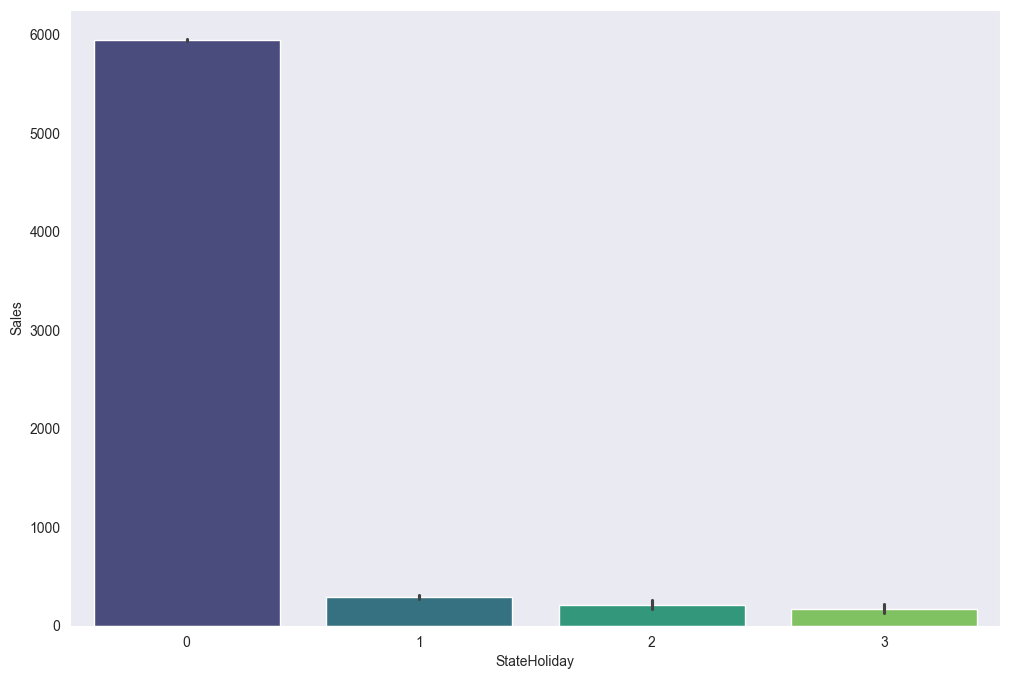

In [55]:
plt.figure(figsize=(12, 8))
StateHoliday_sales = sns.barplot(x="StateHoliday", y="Sales", data= rossmann,palette='viridis')

 0 = None,  1 = public holiday, 2 = Easter holiday, 3 = Christmas

- Sales are significantly higher during None State-holidays than the public holiday, Easter holiday and Christmas

<Axes: xlabel='Customers', ylabel='Sales'>

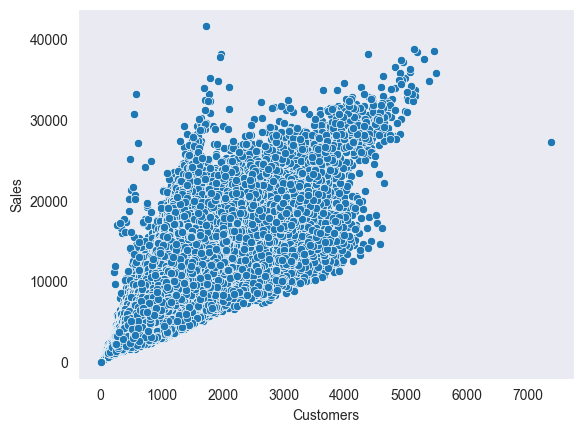

In [56]:
#scatterplot of Customers and Sales
sns.scatterplot(x=rossmann['Customers'], y=rossmann['Sales'])

- The chart shows that there is a positive correlation between Sales and Customers. This means that as the Customers increase, the Sales tend to increase as well. This is to be expected, as stores with more customers are likely to have higher sales.

- There are some outliers in the data, such as the store with the highest sales and the store with the lowest sales.


### 🟢 How did the temporary closure of stores due to refurbishment affect the overall sales of the company, and what evidence can be seen in the Sales over the years plot?

<Axes: ylabel='Density'>

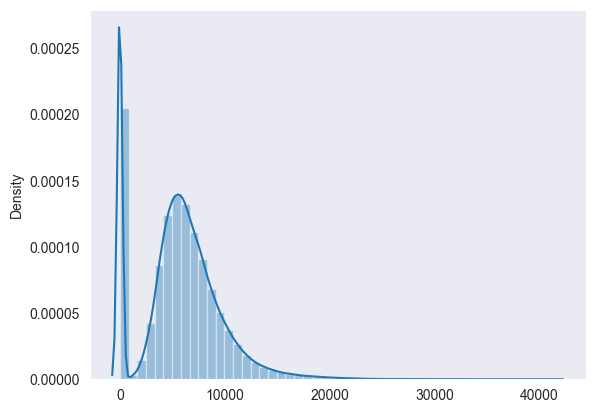

In [57]:
#distribution plot of Sales
sns.distplot(x=rossmann['Sales'])

### 🟢 How does the location of competitor stores impact the sales of Rossman stores?


<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

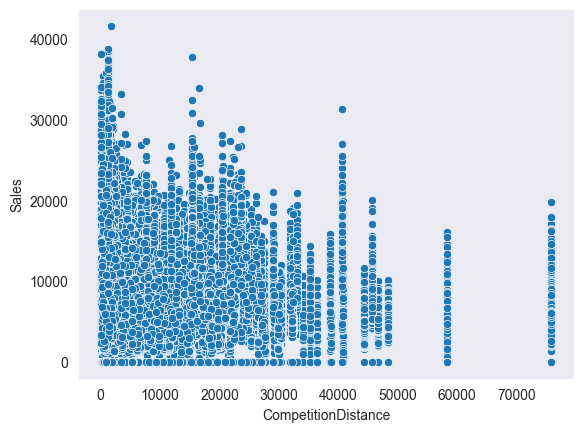

In [58]:
#scatterplot of Competition Distance and Sales
sns.scatterplot(x=rossmann['CompetitionDistance'], y=rossmann['Sales'])

- From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

- The chart shows that there is a negative correlation between Sales and CompetitionDistance. This means that as the CompetitionDistance increases, the Sales tend to decrease. This is to be unexpected, as stores with more competition are likely to have lower sales.

### 🔹 Correlation Heatmap

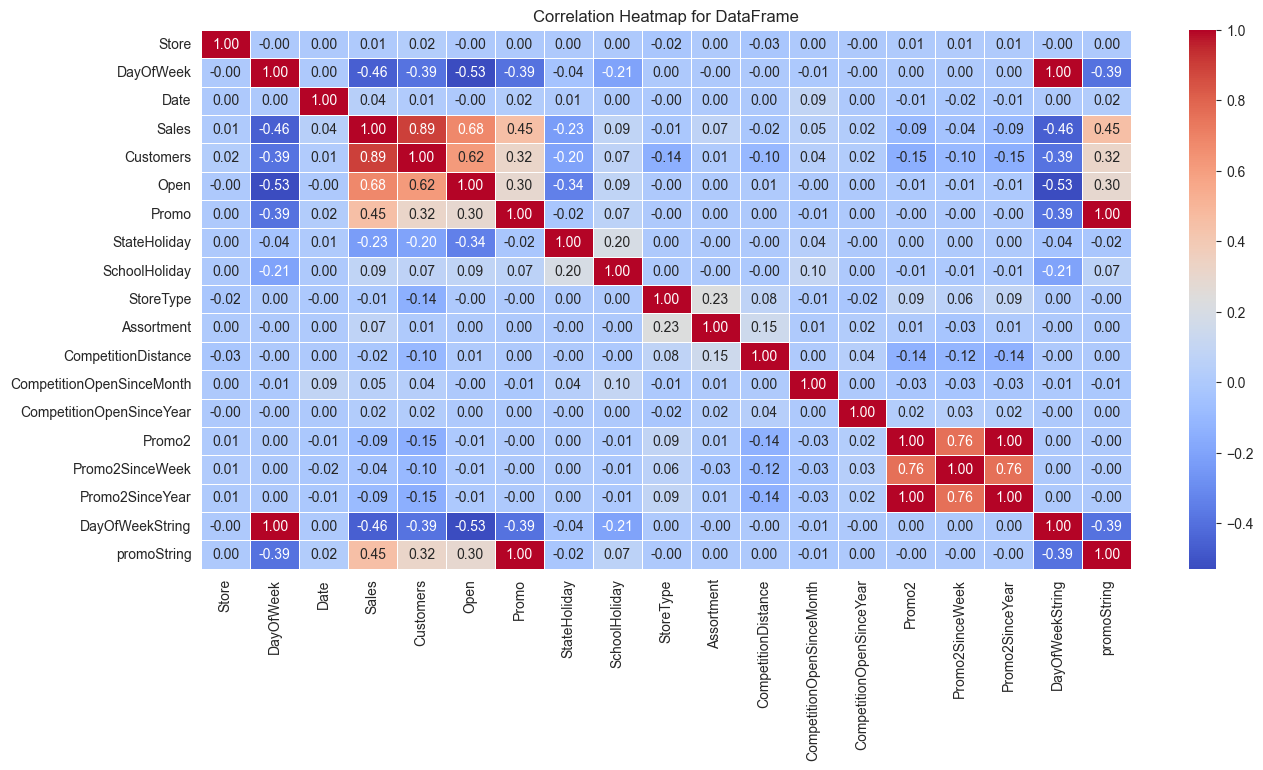

In [59]:
# the code below os for solving the error og=f code
df_heatmap = rossmann.drop(columns='PromoInterval')

plt.figure(figsize=(15, 7))

sns.heatmap(df_heatmap.corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Correlation Heatmap for DataFrame')
plt.show()

- Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation.
- State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.
- CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier.
- There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.


🟢 Pair Plot How do different features (such as Customers, Promo, DayOfWeek, etc.) relate to the Sales target variable in the Rossman sales?

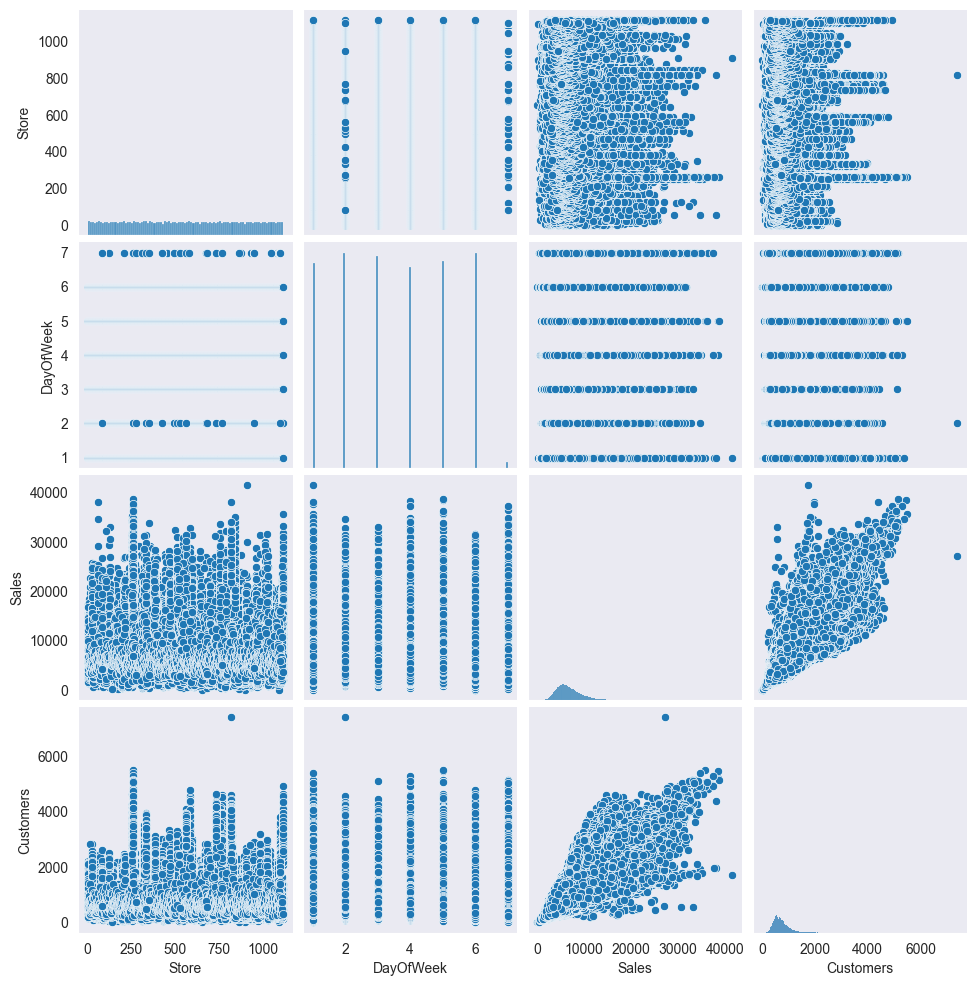

In [60]:
# Filter out the stores with zero sales
corr_df = rossmann[rossmann['Sales'] > 0]

# Create a pairplot
sns.pairplot(corr_df[['Store', 'DayOfWeek', 'Sales', 'Customers']])

- Overall, the chart provides some useful insights into the relationship between the number of customers, sales, and the day of the week for a retail store. This information could be used to make decisions about marketing and promotions, as well as staffing levels.



### 🟢 EDA Conclusions and Hypotheses Validation:

- There's a positive correlation between customers and sales which is explanatory.

- Here it can be deduced that there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.

- The positive effect of promotion on Customers and Sales is observable.

- It is clear that most of the stores remain closed during State and School Holidays.

- But it is important to note that more stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.

- Based on the above findings it seems that there are quite a lot of opportunities in store type 'b' & 'd' as they had more number of customers per store and more sales per customer, respectively. Store type a & c are quite similar in terms of "per customer and per store" sales numbers and just because the majority of the stores were of these kinds, they had the best overall revenue numbers. On the other hand, store type b were very few in number and even then they had better average sales than others.

- Earlier, it was observed that only store type b had all three kinds of assortment levels and rest of the store types had two of them. It seems that in some b type stores the products were different as compared to others because the revenue per store is significantly more than the others.

- When comparing the sales of the three years, it is observable that sales increase by the end of the year indicating that people shop more before the holidays. All the stores showed Christmas seasonality. This validates the previous hypothesis.

- The second thing to notice was that sales dropped for a few months in 2014 accounting for the stores closed due to refurbishment.

- Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away.

### 🔹Perform an appropriate statistical test.

In [61]:
# Perform Statistical Test to obtain P-Value
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the predictors and the response variable
X = rossmann[['DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday']]
y = rossmann['Sales']

# Fit the multiple linear regression model
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                 1.417e+05
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:14:08   Log-Likelihood:            -9.6159e+06
No. Observations:             1017209   AIC:                         1.923e+07
Df Residuals:                 1017204   BIC:                         1.923e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7558.3567      9.075    832.867

The model summary provides us with the p-values for each predictor variable. We can see that the p-values for all predictors are less than 0.05, which indicates that there is a statistically significant relationship between each predictor variable and the sales of Rossman stores.

Therefore, we can reject the null hypothesis and conclude that there is a significant relationship between the DayOfWeek, Promo, StateHoliday, and SchoolHoliday variables and the sales of Rossman stores.

In [62]:
# Perform Statistical Test to obtain P-Value
# Run ANOVA test

model = ols('Sales ~ StoreType', data=rossmann).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Run Tukey's post hoc test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(rossmann['Sales'], rossmann['StoreType'], alpha=0.05)
print(posthoc)

                 sum_sq         df           F        PR(>F)
StoreType  2.570442e+09        1.0  173.450923  1.314442e-39
Residual   1.507442e+13  1017207.0         NaN           NaN
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     0      1  4320.6576   0.0  4241.7165  4399.5987   True
     0      2   -14.5505 0.586   -44.1246    15.0237  False
     0      3   -96.3605   0.0  -118.2763   -74.4446   True
     1      2 -4335.2081   0.0 -4417.4191 -4252.9971   True
     1      3 -4417.0181   0.0 -4496.7948 -4337.2414   True
     2      3     -81.81   0.0  -113.5472   -50.0728   True
-----------------------------------------------------------


### 🟢 Feature Engineering & Data Pre-processing

<Axes: >

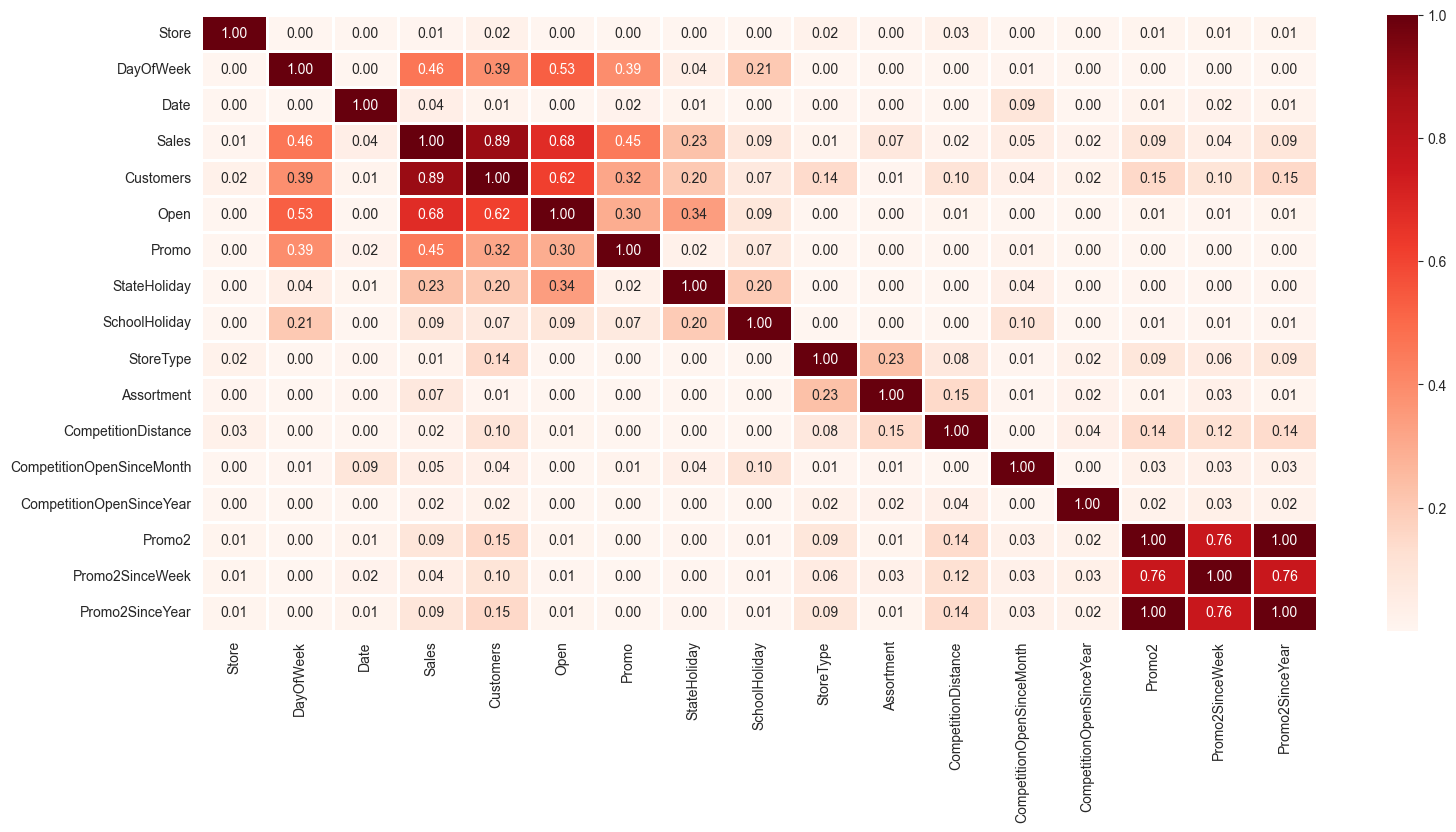

In [63]:
df_heatmap = rossmann.drop(columns=['PromoInterval','DayOfWeekString','promoString'])

#ploting correlation heatmap for better uderstanting of data
plt.figure(figsize=(18,8))
correlation = df_heatmap.corr()
sns.heatmap(abs(correlation), annot=True, cmap='Reds',linewidths=2,fmt=".2f") #Takes the absolute values of the correlation matrix. This is often done to focus on the strength of the relationships rather than the direction (positive or negative).

### 🟢 Handling Outliers

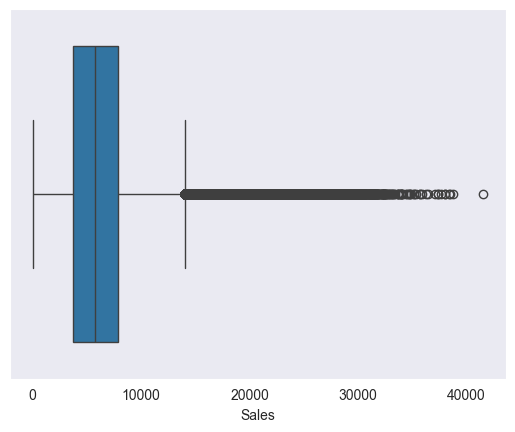

In [64]:
sns.boxplot(x='Sales', data=rossmann)

# we will winsorize the outliers for the 'Sales' variable

from scipy.stats.mstats import winsorize

rossmann['Sales'] = winsorize(rossmann['Sales'], limits=[0.05, 0.05])

# Alternatively, you can remove the outliers for the 'Sales' variable

q1 = rossmann['Sales'].quantile(0.25)
q3 = rossmann['Sales'].quantile(0.75)
iqr = q3 - q1

df = rossmann[(rossmann['Sales'] >= q1 - 1.5*iqr) & (rossmann['Sales'] <= q3 + 1.5*iqr)]

### 🟢 Analysis of Target Variable i.e 'Sales'.

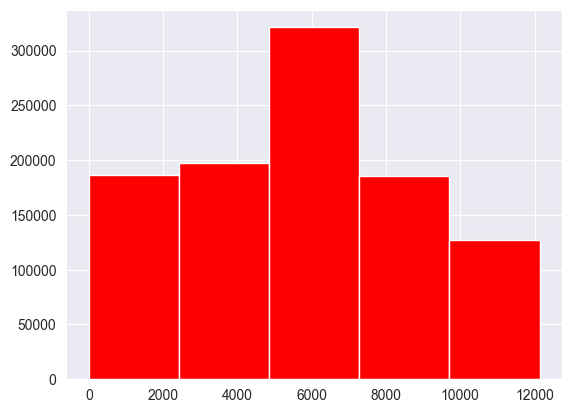

In [65]:
# Create a histogram of the 'Sales' column from the DataFrame 'rossmann'.
pd.Series(rossmann['Sales'],).hist(bins=5, color="red")
plt.show()

In [66]:
rossmann[(rossmann.Open == 0) & (rossmann.Sales == 0)].count()[0]

172817

So we will drop thoose store which sales is 0 assuming that the stores were closed temoprarily and this will help to train the model more accurately

In [67]:
# Filtering and dropping rows where both 'Open' and 'Sales' are 0
rossmann_new = rossmann.drop(rossmann[(rossmann.Open == 0) & (rossmann.Sales == 0)].index)

In [68]:
rossmann_new.shape

(844392, 20)

### 🟢 Encoding  the features

In [69]:
# Perform one-hot encoding on the 'PromoInterval' column of the DataFrame 'new_df'
df = pd.get_dummies(rossmann_new, columns=['PromoInterval'])

In [70]:
df['PromoInterval_0'] = df['PromoInterval_0'].astype(int)
df['PromoInterval_Feb,May,Aug,Nov'] = df['PromoInterval_Feb,May,Aug,Nov'].astype(int)
df['PromoInterval_Jan,Apr,Jul,Oct'] = df['PromoInterval_Jan,Apr,Jul,Oct'].astype(int)
df['PromoInterval_Mar,Jun,Sept,Dec'] = df['PromoInterval_Mar,Jun,Sept,Dec'].astype(int)

In [71]:
df = df.drop(columns=['DayOfWeekString','promoString'])

In [72]:
df.dtypes

Store                                      int64
DayOfWeek                                  int64
Date                              datetime64[ns]
Sales                                      int64
Customers                                  int64
Open                                       int64
Promo                                      int64
StateHoliday                               int32
SchoolHoliday                              int64
StoreType                                  int32
Assortment                                 int32
CompetitionDistance                        int32
CompetitionOpenSinceMonth                  int32
CompetitionOpenSinceYear                   int32
Promo2                                     int64
Promo2SinceWeek                            int32
Promo2SinceYear                            int32
PromoInterval_0                            int32
PromoInterval_Feb,May,Aug,Nov              int32
PromoInterval_Jan,Apr,Jul,Oct              int32
PromoInterval_Mar,Ju

In [73]:
df.to_csv('rossmann_clean_data.csv', index=False)

## 🤖 ML Model Implementation

### By taking a subset from dataframe /  (excluding rows which has sales =0)

In [74]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

In [75]:
# defining dependent variable
dependent_variables = 'Sales'

# defining independent variable
independent_variables = list(df.columns.drop(['Date','Sales']))

🔹 splitting the data into train & test

In [76]:
X = df[independent_variables].values
y = df[dependent_variables].values

In [77]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(675513, 19)
(168879, 19)


In [78]:
# Here we Train the model
reg = LinearRegression().fit(X_train, y_train)

In [79]:
#Checking the Regression Score i.e R-squared value
reg.score(X_train, y_train)

0.6784027922997707

In [80]:
# Checking the cofficient of different independent columns
reg.coef_

array([-1.35056507e-01, -6.15029386e+01,  4.69342546e+00,  3.97637578e-09,
        1.34320709e+03, -1.33365828e+03,  4.57496686e+01,  2.32080069e+02,
        1.96011658e+02,  2.25441509e-02,  2.58874030e+01,  1.16129095e-01,
        3.23627334e+04,  1.08945991e+01, -3.76222066e+01, -3.23627334e+04,
        1.08238148e+04,  1.09447824e+04,  1.05941361e+04])

In [81]:
# Checking the intercept of different indpendent columns
reg.intercept_

34199.7603054082

In [82]:
#Predicting Dependent Variable With Test Dataset i.e 20%
y_pred = reg.predict(X_test)
y_pred

array([5460.89259797, 4904.98803917, 6886.26761354, ..., 4306.91335081,
       7781.7043073 , 5527.45345719])

In [83]:
y_test

array([ 5495,  5472,  7969, ...,  2938, 10413,  5828], dtype=int64)

In [84]:
#Predicting on Train Dataset
y_pred_train = reg.predict(X_train)
y_pred_train

array([5438.4091243 , 6899.79253693, 6383.4615711 , ..., 7198.28037346,
       6849.34500251, 6194.23250438])

In [85]:
# Dependent Variable With Train Dataset i.e 80 %
y_train

array([5409, 7339, 7807, ..., 4817, 6194, 5862], dtype=int64)

In [86]:
#Calculate MSE & RMSE for Test Prediction
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 2077269.720650598
RMSE : 1441.2736453049426


In [87]:
# calculate the R-squared score between the true target values (y_test) and the predicted values
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)

R2 : 0.6816024068607346


In [88]:
# true target values (y_test) and the corresponding predicted values (y_pred) side by side.
pd.DataFrame(zip(y_test, y_pred), columns = ['actual', 'pred']).round(0)

,actual,pred
0,5495,5461.0
1,5472,4905.0
2,7969,6886.0
3,7384,6147.0
4,12137,7278.0
...,...,...
168874,12137,13920.0
168875,9195,6773.0
168876,2938,4307.0
168877,10413,7782.0


### 🟢 SHAP & LIME

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import shap
import lime
import lime.lime_tabular

In [90]:
data = df.copy()
# convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# extract year, month, and day of week from 'Date' column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['DayOfWeek'] = data['Date'].dt.dayofweek

# select relevant features
features = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month']



# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data['Sales'], test_size=0.2, random_state=42)

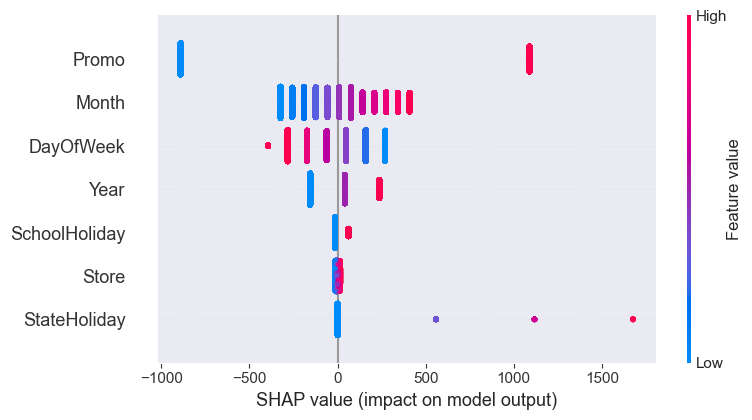

[('2013.00 < Year <= 2014.00', 249272.20457959047), ('Promo <= 0.00', -8578.067319614061), ('6.00 < Month <= 8.00', -6017.265528549783), ('Store <= 281.00', -4426.923408756445)]


In [91]:
# create a linear regression model
model = LinearRegression()

# train the model on the training set
model.fit(X_train, y_train)

# create a SHAP explainer object
explainer = shap.LinearExplainer(model, X_train, feature_dependence="independent")

# calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# plot the SHAP values for the first feature of the first test instance
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# create a LIME explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Sales'], mode='regression')

# explain the prediction for the first test instance using LIME
exp = explainer.explain_instance(X_test.values[0], model.predict, num_features=4)

# print the LIME explanation
print(exp.as_list())

### 🟢 LASSO regression model

In [92]:
#import the cross_val_score function from scikit-learn and creates a Lasso regression model with specific hyperparameters.
from sklearn.model_selection import cross_val_score
L1 = Lasso(alpha = 0.4, max_iter=10000,selection='cyclic', tol=0.0001,)

In [93]:
L1.fit(X_train, y_train)

Lasso(alpha=0.4, max_iter=10000)

In [94]:
y_pred_lasso = L1.predict(X_test)

In [95]:
L1.score(X_test, y_test) #calculates the R-squared score of the Lasso regression model 

0.1778777662929385

In [96]:
# providing an estimate of its generalization ability.
cv_scores = cross_val_score(L1, X, y, cv=10)
mean_cv_score = cv_scores.mean()

In [97]:
cv_scores

array([0.6442303 , 0.66797219, 0.65383059, 0.68693075, 0.6728693 ,
       0.69687985, 0.66347246, 0.68773445, 0.66073347, 0.69248595])

In [98]:
mean_cv_score


0.6727139304110814

In [99]:
from sklearn.model_selection import GridSearchCV, cross_val_score
# define the range of alpha values to test
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]}

# perform grid search to find the best alpha value
lasso_cv = GridSearchCV(L1, parameters, cv=5)
lasso_cv.fit(X, y)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.4, max_iter=10000),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]})

In [100]:
# extract the best alpha value and corresponding score
best_alpha_lasso = lasso_cv.best_params_['alpha']
best_score_lasso= lasso_cv.best_score_

In [101]:
best_alpha_lasso

0.1

In [102]:
best_score_lasso

0.6745071996213433

In [103]:
pd.DataFrame(zip(y_test, y_pred_lasso), columns = ['actual', 'pred'])

,actual,pred
0,5203,5766.416132
1,8590,7565.362524
2,6465,6259.744635
3,7250,6127.203704
4,4339,5918.870642
...,...,...
168874,10096,7987.224693
168875,12137,7725.517823
168876,7499,5316.663764
168877,11606,7649.461405


In [104]:
L2 = Ridge(alpha = 0.5)

In [105]:
#train the Ridge model using the provided training data to learn the relationship between the features (X_train) and the target variable (y_train).
L2.fit(X_train, y_train)

Ridge(alpha=0.5)

In [106]:
#predictions on the test data
L2.predict(X_test)

array([5765.47227182, 7565.06678768, 6258.87477845, ..., 5315.41133557,
       7649.9764836 , 5828.58891335])

In [107]:
# score of the Ridge regression model
L2.score(X_test, y_test)

0.17790253710059634

In [108]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score

ridge = Ridge(max_iter=10000, solver='auto')

# define the range of alpha values to test
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]}

# perform grid search to find the best alpha value
ridge_cv = GridSearchCV(L2, parameters, cv=5)
ridge_cv.fit(X, y)

# extract the best alpha value and corresponding score
best_alpha = ridge_cv.best_params_['alpha']
best_score = ridge_cv.best_score_

# perform cross-validation with the best alpha value
ridge_best = Ridge(alpha=best_alpha, max_iter=10000, solver='auto')
cv_scores = cross_val_score(ridge_best, X, y, cv=5)

# find the maximum score and corresponding alpha value
max_score = cv_scores.max()
max_alpha = best_alpha

print("Best alpha value: ", best_alpha)
print("Best score: ", best_score)
print("Maximum CV score: ", max_score)
print("Corresponding alpha value: ", max_alpha)

Best alpha value:  0.1
Best score:  0.6747396854617008
Maximum CV score:  0.6880952022679274
Corresponding alpha value:  0.1


### 🟢 Elastic Net

In [109]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# define the Elastic Net model
elastic_net = ElasticNet(max_iter=10000)

# define the range of alpha and l1_ratio values to test
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

# perform grid search to find the best alpha and l1_ratio values
elastic_net_cv = GridSearchCV(elastic_net, parameters, cv=5)
elastic_net_cv.fit(X_train, y_train)

# extract the best alpha and l1_ratio values and corresponding score
best_alpha = elastic_net_cv.best_params_['alpha']
best_l1_ratio = elastic_net_cv.best_params_['l1_ratio']
best_score = elastic_net_cv.best_score_

# create an Elastic Net model with the best hyperparameters
elastic_net_best = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=10000)
elastic_net_best.fit(X_train, y_train)

# evaluate the model on the testing set
test_score = elastic_net_best.score(X_test, y_test)

print("Best alpha value: ", best_alpha)
print("Best l1_ratio value: ", best_l1_ratio)
print("Best score: ", best_score)
print("Test score: ", test_score)

Best alpha value:  0.1
Best l1_ratio value:  0.9
Best score:  0.6775758902613351
Test score:  0.6807956255807686


### 🟢 DECISION TREE 


In [110]:
sales_mean=total_df[dependent_variables].mean()

In [111]:
sales_mean

5773.818972305593

In [112]:
sales_mean_new=df[dependent_variables].mean()

In [113]:
sales_mean_new

6771.112606467139

### 🟢 By taking whole dataset

In [114]:
rossmann = rossmann.drop(columns=['DayOfWeekString','promoString'])

In [115]:
rossmann = pd.get_dummies(rossmann, columns=['PromoInterval'])

In [116]:
rossmann['PromoInterval_0'] = rossmann['PromoInterval_0'].astype(int)
rossmann['PromoInterval_Feb,May,Aug,Nov'] = rossmann['PromoInterval_Feb,May,Aug,Nov'].astype(int)
rossmann['PromoInterval_Jan,Apr,Jul,Oct'] = rossmann['PromoInterval_Jan,Apr,Jul,Oct'].astype(int)
rossmann['PromoInterval_Mar,Jun,Sept,Dec'] = rossmann['PromoInterval_Mar,Jun,Sept,Dec'].astype(int)

In [117]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = rossmann.columns.drop(['Store', 'Promo2SinceYear','Date','Sales'])

In [118]:
# Create the data of independent variables
U = rossmann[indep_var].values

# Create the dependent variable data
V = rossmann[dep_var].values

In [119]:
# splitting the dataset
U_train, U_test, v_train, v_test = train_test_split(U, V, test_size=0.2, random_state = 0)
print(U_train.shape)
print(U_test.shape)

(813767, 17)
(203442, 17)


### 🟢 LINEAR REGRESSION

In [120]:
# scling the x values
scaler = StandardScaler()

U_train = scaler.fit_transform(U_train)
U_test = scaler.transform(U_test)

In [121]:
# fitting the data into Lineat Regression Model
linear_regression = LinearRegression()
linear_regression.fit(U_train, v_train)

LinearRegression()

In [122]:
# Use the trained linear regression model to make predictions on the test dataset 'U_test'.
v_pred=linear_regression.predict(U_test)
v_pred

array([ 6756.78363763, 11145.28363763,  8294.28363763, ...,
        6600.40863763,  5836.03363763,  4466.15863763])

In [123]:
# Calculate the R-squared score of the linear regression model on the training data.

linear_regression.score(U_train, v_train)

0.848564231293236

In [124]:
# Create a DataFrame named 'regression_Dataframe' to store the actual and predicted values side by side.

regression_Dataframe = pd.DataFrame(zip(v_test, v_pred), columns = ['actual', 'pred'])
regression_Dataframe

,actual,pred
0,7285,6756.783638
1,6221,11145.283638
2,8132,8294.283638
3,12137,10491.658638
4,5472,6680.408638
...,...,...
203437,5650,6718.783638
203438,5464,6690.283638
203439,6191,6600.408638
203440,5663,5836.033638


In [125]:
# calculate and print the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(v_test, v_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred)
print("R2 :" ,r2)

MSE : 1782285.0150774613
RMSE : 1335.022477367876
RMPSE : 0.2312200094549859
R2 : 0.8497677062807204


### 🟢 DECISION TREE

In [126]:
#Decision Tree regression model to predict the target variable
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(U_train, v_train)
v_pred_dt = decision_tree.predict(U_test)
v_train_dt = decision_tree.predict(U_train)

#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(v_test, v_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_dt)
print("R2 :" ,r2)

MSE : 1245415.4342993165
RMSE : 1115.9818252549262
RMPSE : 0.19328313385088586
R2 : 0.895021494460555


In [127]:
decisiontree_Dataframe = pd.DataFrame(zip(v_test, v_pred_dt), columns = ['actual', 'pred'])
decisiontree_Dataframe

,actual,pred
0,7285,7291.119403
1,6221,11006.721841
2,8132,9216.140395
3,12137,10569.835143
4,5472,6752.551826
...,...,...
203437,5650,6752.551826
203438,5464,4946.920201
203439,6191,7039.972741
203440,5663,5710.508058


### 🟢 Random Forest

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a random forest regressor with n_estimators=500, max_depth=8, and n_jobs=2
random_forest = RandomForestRegressor(n_estimators=500, max_depth=8, n_jobs=2)

# Fit the random forest to the training data
random_forest.fit(U_train, v_train)

# Make predictions on the test data
v_pred_rf = random_forest.predict(U_test)

# Calculate the mean squared error (MSE) between the predicted and actual values
MSE = mean_squared_error(v_test, v_pred_rf)
print("MSE:", MSE)

# Calculate the root mean squared error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

# Calculate the root mean squared percentage error (RMPSE)
sales_mean = np.mean(v_test)
RMPSE = RMSE / sales_mean
print("RMPSE:", RMPSE)

# Calculate the coefficient of determination (R2 score)
r2 = r2_score(v_test, v_pred_rf)
print("R2:", r2)

MSE: 818349.9118387639
RMSE: 904.6269462263236
RMPSE: 0.16079195629336973
R2: 0.9310196835632575


### 🟢 XGBoost Regressor

In [129]:
# importing xgboost as xgb
import xgboost as xgb
# XGBoost regression model to predict the target variable
xgboost = xgb.XGBRegressor(n_estimators=500, max_depth=8, n_jobs=2)
xgboost.fit(U_train, v_train)
v_pred_xgb = xgboost.predict(U_test)

# Mean Squared Error (MSE)
MSE = mean_squared_error(v_test, v_pred_xgb)
print("MSE :", MSE)
# Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)
#Relative RMSE (RMPSE)
RMPSE = RMSE/sales_mean
print("RMPSE :", RMPSE)
#R-squared (R2) score.
r2 = r2_score(v_test, v_pred_xgb)
print("R2 :", r2)

MSE : 126731.1987286408
RMSE : 355.9932565774818
RMPSE : 0.06327564350268651
R2 : 0.9893175791134786


In [130]:
xgb = pd.DataFrame(zip(v_test ,v_pred_xgb), columns = ['actual', 'pred'])
xgb

,actual,pred
0,7285,7318.747559
1,6221,6451.211914
2,8132,7926.786133
3,12137,12016.120117
4,5472,5524.578613
...,...,...
203437,5650,5911.961914
203438,5464,5346.268066
203439,6191,6594.859375
203440,5663,5840.196289


### Conclusion

- I saw that Sales column contains 172817 rows with 0 sale. So we created a new dataframe in which we removed 0 sales rows and tried to train our model. We used various algorithms and got accuracy score around 68%
_____________
- I was also curious about the total dataset(including Sales = 0 rows). So we trained another model using various algorithms and we got accuracy near about 98% which is far better than previous model.
_____________
- So I came to conclusion that removing sales=0 rows actually removes lot of information from dataset as it has 172817 rows which is quite large and therefore we decided not to remove those values. 

- We got our best rmpse score from Random Forest model, Graident boosting technique like Xgboost,we tried taking an optimum parameter so that our model doesnt overfit.

#

# Regards, Tariq Ibrahim 